In [1]:
import pandas as pd
import numpy as np

In [2]:
data_a = {	
	'visitas_a': [24186, 22240, 21915, 24046, 21620, 21651, 22624, 25476, 24232,
				26996, 24418, 26906, 21262, 20247, 21377, 21237, 26087, 25624,
				24754, 23289, 21968, 21819, 20614, 18778, 23902, 21089, 19599,
				16136, 19584, 16925, 23675, 26319, 20691, 21535, 25220, 22885,
				24725, 25090, 26551, 24389, 23229, 24395, 25755, 25270, 23617,
				21501, 24459, 23413, 21180, 19490, 28164, 19612, 21427, 27168,
				25076, 25819, 26386, 26784, 23879, 24669, 22962, 24776, 23591,
				20815, 22421, 25605, 24855, 20280, 22752, 716],
	
	'clicks_a': [1642, 1660, 1728, 1878, 1234, 1320, 1826, 2768, 2940, 3016, 2060,
				3072, 1984, 1544, 1496, 1372, 2278, 2314, 2284, 1452, 1810, 2162,
				1410, 1294, 2096, 1366, 1262, 1022, 1444, 1114, 1688, 2362, 1210,
				1518, 3646, 1954, 2146, 2100, 2794, 2064, 1886, 1732, 2878, 1700,
				1968, 1430, 1254, 1642, 1558, 1148, 1282, 1264, 1568, 2254, 1416,
				1778, 2072, 2248, 1682, 1152, 1540, 1270, 1848, 1928, 1464, 1746,
				2222, 1184, 1170, 62]}

data_b = {
	'visitas_b': [24909, 22986, 22953, 24896, 22284, 22563, 23196, 26238, 24871,
				27869, 25301, 27779, 22008, 21020, 22037, 22006, 27070, 26169,
				25518, 24043, 22593, 22195, 21015, 19337, 24448, 21765, 19933,
				16672, 20329, 17638, 24427, 27232, 21468, 21966, 25987, 23607,
				25487, 25926, 27237, 25163, 23965, 25037, 26214, 25999, 24272,
				22336, 25271, 24220, 22014, 20195, 29069, 20320, 22058, 28055,
				25992, 26678, 26949, 27701, 24951, 25561, 23766, 25646, 24677,
				21441, 23269, 26265, 25563, 20869, 23276, 707],
	
	'clicks_b': [1714, 1778, 1848, 2008, 1270, 1372, 1868, 2872, 3014, 3110, 2094,
				3278, 1982, 1648, 1500, 1362, 2582, 2326, 2386, 1540, 1892, 2160,
				1476, 1336, 2108, 1418, 1252, 1078, 1550, 1156, 1860, 2288, 1228,
				1602, 3766, 2000, 2320, 2166, 3010, 2010, 1928, 1890, 2960, 1716,
				1950, 1534, 1418, 1796, 1522, 1224, 1346, 1350, 1534, 2436, 1404,
				1790, 2180, 2574, 1824, 1162, 1586, 1390, 1950, 2020, 1484, 1818,
				2348, 1280, 1136, 60]}

In [3]:
df = pd.concat([pd.DataFrame(data_a), pd.DataFrame(data_b)], axis=1)

# Frequentista

O objetivo do teste é encontrar uma diferença para escolha da página que tenha um nível de significância (p-valor) < 0.05. 

Será necessário o agrupamento dos dados para obter os seguintes valores:

Conversão:
$$\lambda a = \frac{clicks A}{visitantes A}$$ 

$$\lambda b = \frac{clicks B}{visitantes B}$$

Conversão Total:

$$ \lambda = \frac{clicks A + clicks B}{visitantes A + visitantes B}$$

Valor Z:
$$Z = \frac{\lambda b - \lambda a}{\sqrt{\lambda (1 - \lambda) (\frac{1}{visitante a} + \frac{1}{visitante b})}} $$

In [4]:
# Cálculo conversão
df['conversao_a'] = df['clicks_a'] / df['visitas_a']
df['conversao_b'] = df['clicks_b'] / df['visitas_b']
df['conversao_total'] = (df['clicks_a'] + df['clicks_b']) / (df['visitas_a'] + df['visitas_b'])

In [5]:
# Cálculo de visitas e clicks acumulados
# Necessário para observar a mudança do Z score durante os dias
df['acu_visitas_a'] = df['visitas_a'].cumsum()
df['acu_visitas_b'] = df['visitas_b'].cumsum()
df['acu_clicks_a'] = df['clicks_a'].cumsum()
df['acu_clicks_b'] = df['clicks_b'].cumsum()

In [6]:
# Cálculo de conversão individual e total acumuladas
df['acu_conversao_a'] = df['acu_clicks_a'] / df['acu_visitas_a']
df['acu_conversao_b'] = df['acu_clicks_b'] / df['acu_visitas_b']
df['acu_conversao_total'] = (df['acu_clicks_a'] + df['acu_clicks_b']) / (df['acu_visitas_a'] + df['acu_visitas_b'])

In [7]:
# Cálculo do score Z
def return_z_score(df):
    nm = df['acu_conversao_b'] - df['acu_conversao_a']
    dm = (
        np.sqrt(
            (df['conversao_total'] * (1 - df['conversao_total'])) *
            ((1 / df['acu_visitas_a']) + (1 / df['acu_visitas_b']))))
    return nm / dm

df['z'] = df.apply(return_z_score, axis=1)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')

In [9]:
# CTR acumulado
df['acu_ctr_a'] = df['acu_conversao_a'].cumsum()
df['acu_ctr_b'] = df['acu_conversao_b'].cumsum()

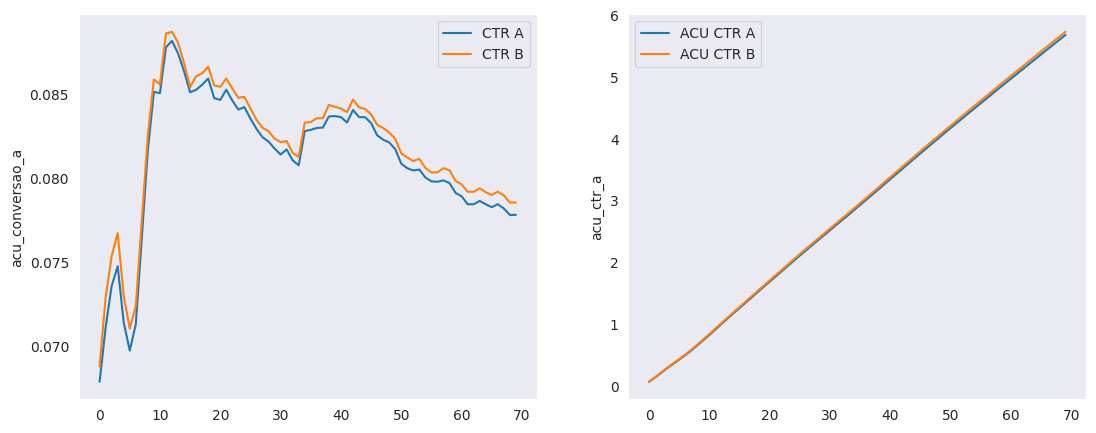

In [10]:
plt.figure(figsize=(13,5))

plt.subplot(1, 2, 1)
sns.lineplot(df['acu_conversao_a'], label='CTR A');
sns.lineplot(df['acu_conversao_b'], label='CTR B');
plt.legend();

plt.subplot(1, 2, 2)
sns.lineplot(df['acu_ctr_a'], label='ACU CTR A');
sns.lineplot(df['acu_ctr_b'], label='ACU CTR B');
plt.legend();

In [11]:
# Gerando p-valor
from scipy import stats
df['p-value'] = 2 * (1 - stats.norm.cdf(df['z']))

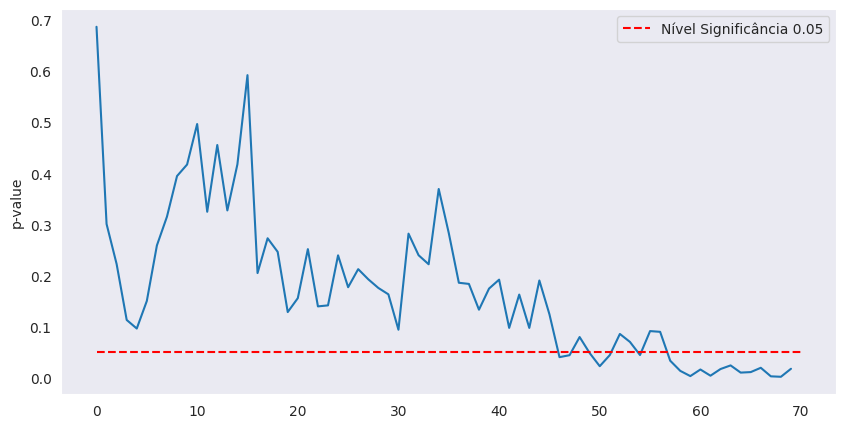

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(df['p-value'])
plt.hlines(0.05, 0, 70, color='red', linestyle='--', label='Nível Significância 0.05')
plt.legend();

Observa-se que a estabilização do p-value ocorreu somente próximo ao 60º dia do experimento. Antes disso uma ocorrência do **Erro Tipo I** seria mais provável.

# Bayesiano

$\lambda c = \frac{clicks}{visitantes}$ -> taxa de conversão


Qual a probabilidade de $\lambda c$ estar dentro de um intervalo? **(maior intervalor, maior incerteza)**

*pdf ou fdp* -> função que descreve o comportamento da curva e integrando essa função obtemos o valor do intervalo de $\lambda cmin - \lambda cmax$ -- função $P(a<x<b)$

Função densidade de probabilidade (fdp):

**Teorema de Bayes:** $$P(\lambda c | visitas,clicks) = \frac{P(visitas,clicks|\lambda c)P(\lambda c)}{P(visitas,clicks)}$$ 
**Pode ser tb - aqui f é considerada distribuição beta**: $$P(\lambda c| visitas,clicks) = f(x, a + clicks, b + não clicks) $$
**Distribuição beta**: $$f(x,a,b) = \frac{x^{a-1}(1-x)^{b-1}}{\beta (a,b)} $$

A integral da distribuição $\beta$ pode ser resolvida utilizado o método **Monte Carlo**:

$$P(\lambda c^B > \lambda c^A) = \frac{1}{N}\sum_{x} \frac{\beta (x, \alpha A, \beta A) \beta (x, \alpha B, \beta B)}{N(\mu A, \sigma A) N(\mu B, \sigma B)}$$

Onde:
- $\alpha$: sucesso ou clicks
- $\beta$: fracasso ou não clicks
- N: normal que depende de $\mu$ e $\sigma$

In [13]:
from scipy import stats

In [14]:
# Quantidade de amostras
N_mc = 100000

In [15]:
# Cálculo de média e variância
def calc_u_sigma(clicks, visitas):
    u, var = stats.beta.stats(a=1 + clicks, b=1 + (visitas - clicks), moments='mv')
    return u, np.sqrt(var)

# Amostras da Normal dist 
def get_sample(u, sigma, N):
    return np.random.normal(loc=u, scale=1.25*sigma, size=N)

# Cálculo Beta dist
def calc_beta(x, clicks, visitas):
    return stats.beta.pdf(x, a=1 + clicks, b=1 + (visitas - clicks))

# Cálculo Normal (N) dist
def calc_n(x, u, sigma):
    return stats.norm.pdf(x, loc=u, scale=1.25*sigma)

# Cálculo de risco esperado
# O risco de escolher uma determinada página
def calc_expected_loss(x1, x2, y, N):
    return (1/N) * np.sum(((x1 - x2)*y)[x1 >= x2])

In [16]:
# Cálculo da probabilidade de B melhor que A
def calc_probabilidade(clicks_a, visitas_a, clicks_b, visitas_b, N, loss=None):
    u_a, sigma_a = calc_u_sigma(clicks_a, visitas_a)
    u_b, sigma_b = calc_u_sigma(clicks_b, visitas_b)
    
    x_a = get_sample(u_a, sigma_a, N)
    x_b = get_sample(u_b, sigma_b, N)
    
    beta_a = calc_beta(x_a, clicks_a, visitas_a)
    beta_b = calc_beta(x_b, clicks_b, visitas_b)
    
    norm_a = calc_n(x_a, u_a, sigma_a)
    norm_b = calc_n(x_b, u_b, sigma_b)
    
    # Beta / Normal
    y = (beta_a * beta_b) / (norm_a * norm_b)
    
    # Somente onde B > A
    yb = y[x_b >= x_a]    
    
    # Probabilidade de B ser melhor que A
    p = (1 / N) * np.sum(yb)
    
    # Erro ao assumir B melhor que A
    if loss == 'A':
        return calc_expected_loss(x_b, x_a, y, N)
    elif loss == 'B':
        return calc_expected_loss(x_a, x_b, y, N)
    else:
        return p

In [17]:
df['probabilidade_b_ge_a'] = df.apply(lambda x: calc_probabilidade(x['acu_clicks_a'], x['acu_visitas_a'], x['acu_clicks_b'], x['acu_visitas_b'], N_mc), axis=1)

In [18]:
df['expected_loss_a'] = df.apply(lambda x: calc_probabilidade(x['acu_clicks_a'], x['acu_visitas_a'], x['acu_clicks_b'], x['acu_visitas_b'], N_mc, loss='A'), axis=1)
df['expected_loss_b'] = df.apply(lambda x: calc_probabilidade(x['acu_clicks_a'], x['acu_visitas_a'], x['acu_clicks_b'], x['acu_visitas_b'], N_mc, loss='B'), axis=1)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

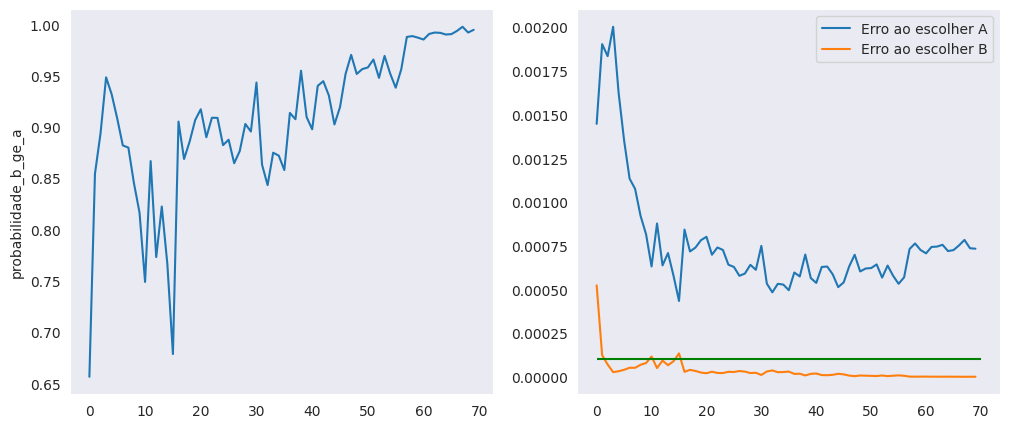

In [20]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data=df['probabilidade_b_ge_a'])

plt.subplot(1, 2, 2)
rename = {'expected_loss_a': 'Erro ao escolher A', 'expected_loss_b': 'Erro ao escolher B'}
sns.lineplot(data=df[['expected_loss_a', 'expected_loss_b']].rename(columns=rename), dashes=False)
plt.hlines(1e-4, 0, 70, color='green');

# A linha verde representa a probabilidade de mais de 99% da escolha correta de B m detrimento de A

Observa-se que a estabilização da probabilidade de melhora de B em relação a A ocorre no 20º dia.

### Pequenos testes

In [21]:
# Variando número de amostras de N
df['probabilidade_b_ge_a_1M'] = df.apply(lambda x: calc_probabilidade(x['acu_clicks_a'], x['acu_visitas_a'], x['acu_clicks_b'], x['acu_visitas_b'], 1000000), axis=1)
df['probabilidade_b_ge_a_100k'] = df.apply(lambda x: calc_probabilidade(x['acu_clicks_a'], x['acu_visitas_a'], x['acu_clicks_b'], x['acu_visitas_b'], 100000), axis=1)
df['probabilidade_b_ge_a_10k'] = df.apply(lambda x: calc_probabilidade(x['acu_clicks_a'], x['acu_visitas_a'], x['acu_clicks_b'], x['acu_visitas_b'], 10000), axis=1)
df['probabilidade_b_ge_a_1k'] = df.apply(lambda x: calc_probabilidade(x['acu_clicks_a'], x['acu_visitas_a'], x['acu_clicks_b'], x['acu_visitas_b'], 1000), axis=1)
df['probabilidade_b_ge_a_100'] = df.apply(lambda x: calc_probabilidade(x['acu_clicks_a'], x['acu_visitas_a'], x['acu_clicks_b'], x['acu_visitas_b'], 100), axis=1)
df['probabilidade_b_ge_a_10'] = df.apply(lambda x: calc_probabilidade(x['acu_clicks_a'], x['acu_visitas_a'], x['acu_clicks_b'], x['acu_visitas_b'], 10), axis=1)

In [22]:
columns = ['probabilidade_b_ge_a_1M', 'probabilidade_b_ge_a_100k', 'probabilidade_b_ge_a_10k', 'probabilidade_b_ge_a_1k', 'probabilidade_b_ge_a_100', 'probabilidade_b_ge_a_10']
df[columns]

,probabilidade_b_ge_a_1M,probabilidade_b_ge_a_100k,probabilidade_b_ge_a_10k,probabilidade_b_ge_a_1k,probabilidade_b_ge_a_100,probabilidade_b_ge_a_10
0,0.656638,0.649558,0.656026,0.638879,0.582140,0.890214
1,0.854859,0.855172,0.854633,0.907652,0.950841,0.751253
2,0.894943,0.897140,0.901186,0.888822,0.910402,0.854324
3,0.946801,0.946905,0.950956,0.931131,0.928408,1.072771
4,0.931707,0.929783,0.935397,0.919584,0.891327,0.900668
...,...,...,...,...,...,...
65,0.990445,0.991603,0.988840,0.996463,1.011264,1.098326
66,0.993369,0.994068,0.992865,0.966743,0.978883,0.837519
67,0.995188,0.994246,0.995885,0.991280,1.021536,1.294256
68,0.993591,0.992844,0.990477,0.972270,0.990895,0.819464


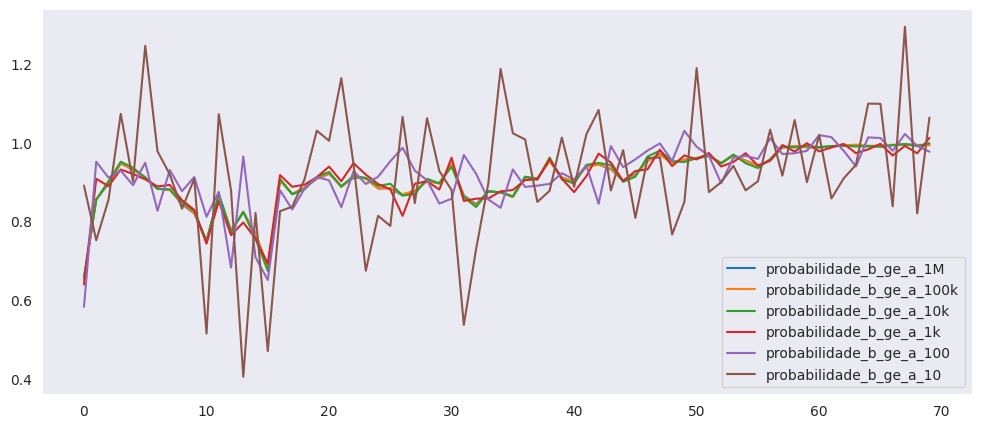

In [23]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df[columns], dashes=False);